<a href="https://colab.research.google.com/github/coolboyteo2k/git-demo/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse 

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145118 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.18-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

11493376/11490434 [==============================] - 2s 0us/step
(50000, 28, 28)


In [0]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_val=X_val.reshape(X_val.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)


In [7]:
Y_train=np_utils.to_categorical(y_train,10)
Y_val=np_utils.to_categorical(y_val,10)
Y_test=np_utils.to_categorical(y_test,10)

print('Du lieu y ban dau',y_train[0])
print('Du lieu y sau one-hot encoding', Y_train[0])

Du lieu y ban dau 5
Du lieu y sau one-hot encoding [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
model=Sequential()

# Them layer dau tien, convolutional layer voi 32 kernel, kich thuoc kernel 3*3
model.add(Conv2D(32,(3,3),activation='sigmoid',input_shape=(28,28,1)))

# Convolutional layer
model.add(Conv2D(32,(3,3),activation="sigmoid"))

#Max-pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer tu tensor sang vector
model.add(Flatten())

#Fully Connected layer 128 nodes dung ham sigmoid
model.add(Dense(128,activation='sigmoid'))

#Output layer voi 10 node va dung softmax function chuyen sang xac suat
model.add(Dense(10,activation='softmax'))

In [9]:
#Toi uu loss function

model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [11]:
# train model voi data
H=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),
            batch_size=32,epochs=10,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/10





50000/50000 [==============================] - 23s 454us/step - loss: 0.3152 - acc: 0.9157 - val_loss: 0.0690 - val_acc: 0.9827
Epoch 2/10
50000/50000 [==============================] - 9s 173us/step - loss: 0.0606 - acc: 0.9830 - val_loss: 0.0547 - val_acc: 0.9833
Epoch 3/10
50000/50000 [==============================] - 9s 177us/step - loss: 0.0380 - acc: 0.9892 - val_loss: 0.0472 - val_acc: 0.9862
Epoch 4/10
50000/50000 [==============================] - 9s 171us/step - loss: 0.0259 - acc: 0.9925 - val_loss: 0.0435 - val_acc: 0.9875
Epoch 5/10
50000/50000 [==============================] - 9s 173us/step - loss: 0.0167 - acc: 0.9956 - val_loss: 0.0437 - val_acc: 0.9879
Epoch 6/10
50000/50000 [==============================] - 9s 176us/step - loss: 0.0117 - acc: 0.9969 - val_loss: 0.0409 - val_acc: 0.9871
Epoch 7/10
50000/50

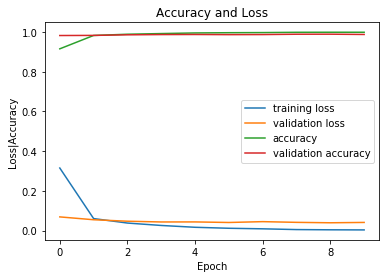

In [13]:
# Ve do thi loss, accuracy cua training set va validation set

fig=plt.figure()
numOfEpoch=10
plt.plot(np.arange(0,numOfEpoch),H.history['loss'],label='training loss')
plt.plot(np.arange(0,numOfEpoch),H.history['val_loss'],label='validation loss')
plt.plot(np.arange(0,numOfEpoch),H.history['acc'],label='accuracy')
plt.plot(np.arange(0,numOfEpoch),H.history['val_acc'],label='validation accuracy')

plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [14]:
# Danh gia model voi du lieu test set
score=model.evaluate(X_test,Y_test,verbose=0)
print(score)

[0.037062044886650984, 0.9892]


Gia tri du doan:  2


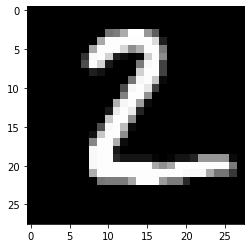

In [19]:
plt.imshow(X_test[1].reshape(28,28),cmap='gray')

y_predict=model.predict(X_test[1].reshape(1,28,28,1))
print('Gia tri du doan: ',np.argmax(y_predict))